# Repulsive interaction

We will in this notebook use importance sampling to compute the ground state energies for the repulsive system with an elliptical harmonic oscillator trap.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from vmc.interface import *
from vmc import run_all

from IPython.core.display import display

In [2]:
sns.set(color_codes=True)

In [3]:
mass = 1.0
omega = 1.0

beta = _lambda = np.sqrt(8)
radius = 0.0043

num_particles_list = [10, 50, 100]
num_dimensions = 3

step_length = 0.1

num_samples = int(2**18)
num_thermalization_steps = int(0.1*num_samples)

alpha_min = 0.5*omega - 0.3
alpha_max = 0.5*omega + 0.3
num_alphas = 7

parameter_names = ["alpha"]

alphas = np.linspace(alpha_min, alpha_max, num_alphas).reshape(num_alphas, 1)
bootstrap_samples = 0

In [4]:
def output_table(df, filename):
    columns = list(df)
    columns.remove("variance")
    columns.remove("std")
    columns.remove("block_var")

    df[columns].to_csv(
        filename,
        index=False,
        sep="&",
        header=[
            r"$\alpha$", r"$\langle E_L\rangle$",
            r"$A$", r"$t_C$", r"$\sigma_b$"],
        float_format="%.5f",
        line_terminator="\\\\ \n",
        quotechar=" "
    )

In [5]:
df_list = []
for num_particles in num_particles_list:
    kwargs = {
        "num_samples": num_samples, "num_thermalization_steps": num_thermalization_steps,
        "step_length": step_length
    }

    wavefunction = PyInteractingEllipticalGaussian(
        num_particles, num_dimensions, mass, omega, beta, radius, spread=np.sqrt(step_length)
    )

    sampler_int = PySampler(
        wavefunction, PyEllipticalHarmonicOscillator(_lambda), PyImportanceMetropolis()
    )

    df_int = run_all(
        sampler_int, alphas, parameter_names, bootstrap_samples, **kwargs
    )

    display(df_int)

    df_list.append(df_int.copy())

    #output_table(df_int, "../data/tables/3D{0}N_interaction.dat".format(num_particles))

    #plt.errorbar(
    #    df_int["alpha"], df_int["energy"]/num_particles,
    #    yerr=df_int["block_std"]/num_particles, label=r"$N = %d$" % num_particles
    #)

100%|██████████| 7/7 [00:23<00:00,  3.31s/it]


,alpha,energy,variance,std,acceptance,sampling_time,block_var,block_std
0,0.2,35.022319,2.019528e-04,0.014211,0.989910,3.068444,1.998037e-02,0.141352
1,0.3,27.532347,5.395884e-05,0.007346,0.981747,3.136215,3.888499e-03,0.062358
2,0.4,24.987162,9.665749e-06,0.003109,0.972145,3.248917,5.523387e-04,0.023502
3,0.5,24.399015,1.060475e-08,0.000103,0.961796,3.767317,6.024109e-07,0.000776
4,0.6,24.876356,6.594602e-06,0.002568,0.949966,3.109744,2.733394e-04,0.016533
5,0.7,25.860177,2.326726e-05,0.004824,0.937214,2.846270,8.360443e-04,0.028914
6,0.8,27.184448,4.722298e-05,0.006872,0.924557,3.696744,1.437481e-03,0.037914


100%|██████████| 7/7 [05:32<00:00, 47.55s/it]


,alpha,energy,variance,std,acceptance,sampling_time,block_var,block_std
0,0.2,182.462631,1.142908e-03,0.033807,0.987854,46.789178,0.575107,0.758358
1,0.3,143.229088,2.939607e-04,0.017145,0.978981,44.091860,0.098334,0.313583
2,0.4,129.702102,4.868188e-05,0.006977,0.968533,42.732608,0.012311,0.110953
3,0.5,127.288821,7.946286e-07,0.000891,0.957111,43.900341,0.000302,0.017384
4,0.6,130.066598,3.971137e-05,0.006302,0.944889,50.608402,0.006973,0.083502
5,0.7,135.633936,1.302240e-04,0.011412,0.933289,51.297495,0.023727,0.154037
6,0.8,143.292692,2.536326e-04,0.015926,0.920551,53.345437,0.043250,0.207967


100%|██████████| 7/7 [19:39<00:00, 168.44s/it]


,alpha,energy,variance,std,acceptance,sampling_time,block_var,block_std
0,0.2,371.687266,0.002306,0.048022,0.965389,186.421738,1.885454,1.373118
1,0.3,295.974975,0.000532,0.023069,0.975471,170.410739,0.259267,0.509183
2,0.4,270.815349,0.000089,0.009452,0.964298,185.333238,0.035253,0.187759
3,0.5,266.406207,0.000004,0.002027,0.953495,164.403997,0.002737,0.052318
4,0.6,272.751977,0.000087,0.009313,0.941914,161.321532,0.032312,0.179755
5,0.7,285.351571,0.000304,0.017428,0.929047,155.946577,0.106981,0.327080
6,0.8,302.093826,0.000552,0.023503,0.913036,155.018092,0.170884,0.413381


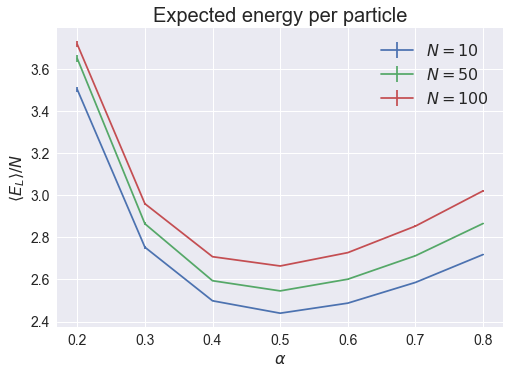

In [6]:
for i, df_int in enumerate(df_list):
    plt.errorbar(
        df_int["alpha"], df_int["energy"]/num_particles_list[i],
        yerr=df_int["block_std"]/num_particles_list[i], label=r"$N = %d$" % num_particles_list[i]
    )

plt.xlabel(r"$\alpha$", fontsize=16)
plt.ylabel(r"$\langle E_L\rangle/N$", fontsize=16)
plt.title(
    r"Expected energy per particle", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc="best", fontsize=16)
plt.savefig("../data/figures/problem_e.pdf")
plt.show()